In [16]:
import requests 
import pandas as pd
import numpy as np

from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

from config import API_KEY

In [20]:
r = requests.get('https://maps.googleapis.com/maps/api/geocode/json?address={},+Los+Angeles,+CA&key={}'.format([address, API_KEY]))

In [21]:
r.json()['results'][0]['geometry']['location']


{'lat': 33.931331, 'lng': -118.3088126}

In [3]:
store_locs = pd.read_csv("CSVs/m_tape460.csv")

In [4]:
store_locs = store_locs.loc[store_locs['Premise City'] == "LOS ANGELES",:]

In [5]:
store_locs = store_locs.loc[(store_locs["License Type"] == 20) | (store_locs["License Type"] == 21) , :]

In [6]:
store_locs["License Type"].value_counts()

21    837
20    820
Name: License Type, dtype: int64

In [7]:
addressess = list(store_locs['Premise Street Address 1' ])

In [8]:
new_addresses = []

for address in addressess:
    thing = address.replace(" ", "+")
    new_addresses.append(thing)
new_addresses

['5402+S+VERMONT+AVE',
 '3479+MOTOR+AVE',
 '5080+RODEO+RD',
 '863+S+VERMONT+AVE',
 '8874+CADILLAC+AVE',
 '5061+ALHAMBRA+AVE',
 '2618+W+PICO+BLVD',
 '1091+S+HOOVER+ST',
 '2108+LAUREL+CANYON+BLVD',
 '3431+MAPLE+AVE',
 '1566+COLORADO+BLVD',
 '10850+NATIONAL+BLVD',
 '6854+LA+TIJERA+BLVD',
 '4910+HUNTINGTON+DR+S',
 '801-803+CESAR+E+CHAVEZ+AVE',
 '333+W+PICO+BLVD',
 '2520+GLENDALE+BLVD',
 '1769+W+IMPERIAL+HWY',
 '1717+S+WESTERN+AVE',
 '7040+HOLLYWOOD+BLVD',
 '5753+MELROSE+AVE',
 '1735+W+7TH+ST',
 '2541-43+W+THIRD+ST',
 '1410+S+SOTO+ST',
 '3334+W+8TH+ST',
 '9500+S+MAIN+ST',
 '1651+E+103RD+ST',
 '4935+MCCONNELL+AVE',
 '3300+W+SLAUSON+AVE',
 '6009+HOOPER+AVE',
 '1512+W+PICO+BLVD',
 '5634+N+FIGUEROA+ST',
 '7224+S+VERMONT+AVE',
 '2791+W+PICO+BLVD',
 '1201+W+CENTURY+BLVD',
 '2642+CRENSHAW+BLVD',
 '446+E+WASHINGTON+BLVD',
 '3237-39+GLENDALE+BLVD',
 '1460+S+LA+CIENEGA+BLVD',
 '11840+WILMINGTON+AVE',
 '4757+MELROSE+AVE',
 '5021+SANTA+MONICA+BLVD',
 '1805+W+7TH+ST',
 '3666-68+WHITTIER+BLVD',
 '6912+S+

In [9]:
lat_long = []
p = 0
for address in new_addresses:
    try:
        r = requests.get('https://maps.googleapis.com/maps/api/geocode/json?address={},+Los+Angeles,+CA&key={}'.format(address, API_KEY))
        lat_long.append(r.json()['results'][0]['geometry']['location'])
        
    except IndexError:
        print("IndexError!")
    p += 1
    if(p % 100 == 0):
        print(p)
    

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600


In [11]:
lat_long

[{'lat': 33.9930071, 'lng': -118.2910178},
 {'lat': 34.0264881, 'lng': -118.4090205},
 {'lat': 34.021536, 'lng': -118.3550926},
 {'lat': 34.056251, 'lng': -118.2920101},
 {'lat': 34.039966, 'lng': -118.384595},
 {'lat': 34.0708137, 'lng': -118.1759705},
 {'lat': 34.0471387, 'lng': -118.2951391},
 {'lat': 34.0511115, 'lng': -118.2845459},
 {'lat': 34.1090135, 'lng': -118.369663},
 {'lat': 34.0165576, 'lng': -118.2700323},
 {'lat': 34.1391268, 'lng': -118.2003847},
 {'lat': 34.0300538, 'lng': -118.4214902},
 {'lat': 33.9761297, 'lng': -118.3726572},
 {'lat': 34.0866365, 'lng': -118.1760208},
 {'lat': 34.0567893, 'lng': -118.2279991},
 {'lat': 34.0389218, 'lng': -118.2639456},
 {'lat': 34.1029234, 'lng': -118.2584182},
 {'lat': 33.931331, 'lng': -118.3088126},
 {'lat': 34.0421696, 'lng': -118.310178},
 {'lat': 34.101393, 'lng': -118.3429025},
 {'lat': 34.0838043, 'lng': -118.3262374},
 {'lat': 34.0550051, 'lng': -118.2732486},
 {'lat': 34.0656109, 'lng': -118.27771},
 {'lat': 34.0238008, 

In [12]:
lng = []

lat = []


for element in lat_long:
    lng.append(element['lng'])
    lat.append(element['lat'])


In [14]:
store_locations = pd.DataFrame({"Latitude": lat, "Longitude": lng})

In [25]:
store_locations.loc[store_locations["Longitude"] > -118, :]
store_locations = store_locations.drop([637,1158,1573])

In [26]:
store_locations.to_csv('CSVs/store_locations.csv')


/Users/AlexMac/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:841: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  return func(v)


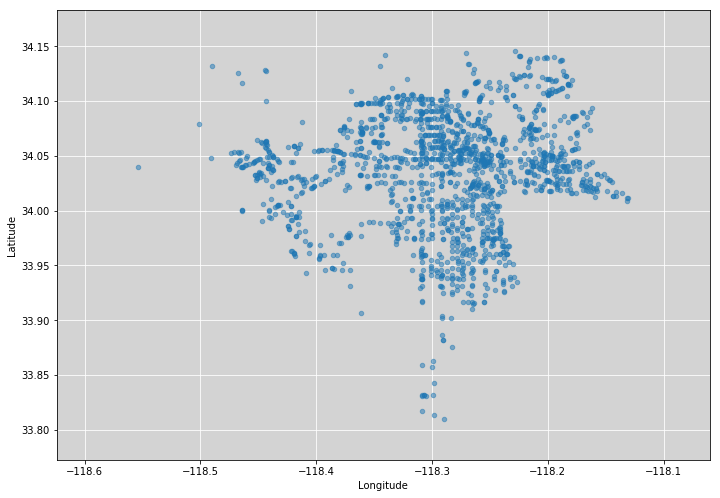

In [55]:
fig, ax = plt.subplots()

fig.set_size_inches(11.7, 8.27)
ax.set_axisbelow(True)
ax.grid(b=True, which='major', color = "white")
ax.grid(b=True, which='minor')

plot = sns.regplot(x="Longitude", y="Latitude", data=store_locations, scatter_kws={"s": 20, 'alpha':0.5}, fit_reg=False)
plot.set(axis_bgcolor='lightgrey')

plt.show()